# Buisness Objective:

# Data Set

# 1.Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import spacy
import nltk

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')
sia = SentimentIntensityAnalyzer()    #VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bodak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Importing Data Set

In [3]:
data = pd.read_csv(r"D:\ExcelR P202\financial_sentiment_data.csv")
data

Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5842 rows x 2 columns]

In [4]:
#showing first five records 
data.head()

Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral

# 3.Data Pre-Processing/ Data Understanding

In [5]:
data.head() #first five records

Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral

In [6]:
data.tail() #last five Records

Sentence Sentiment
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

In [7]:
data.info() #Basic informtion about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [8]:
data.shape

(5842, 2)

In [9]:
data.isna().sum() #cheking null values

Sentence     0
Sentiment    0
dtype: int64

In [10]:
data.describe() #Describe Data

Sentence Sentiment
count                                                5842      5842
unique                                               5322         3
top     Managing Director 's comments : `` Net sales f...   neutral
freq                                                    2      3130

In [11]:
data.columns #columns names

Index(['Sentence', 'Sentiment'], dtype='object')

In [12]:
data.dtypes  #checking data types of columns

Sentence     object
Sentiment    object
dtype: object

In [13]:
data.groupby('Sentiment').describe()

Sentence                                                            \
             count unique                                                top   
Sentiment                                                                      
negative       860    860  $ESI on lows, down $1.50 to $2.50 BK a real po...   
neutral       3130   3124  SSH Communications Security Corporation is hea...   
positive      1852   1852  The GeoSolutions technology will leverage Bene...   

                
          freq  
Sentiment       
negative     1  
neutral      2  
positive     1

In [14]:
#checking number of characters in each sentence
data['No. of Characters'] = data['Sentence'].str.len()
data.head()

Sentence Sentiment  \
0  The GeoSolutions technology will leverage Bene...  positive   
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative   
2  For the last quarter of 2010 , Componenta 's n...  positive   
3  According to the Finnish-Russian Chamber of Co...   neutral   
4  The Swedish buyout firm has sold its remaining...   neutral   

   No. of Characters  
0                218  
1                 55  
2                193  
3                128  
4                135

In [15]:
data = data.drop('No. of Characters',axis=1)

# Text Preprocessing

In [16]:
#Removing unwanted symbols, punctuations marks etc.

In [17]:
#creating functions to clean the Sentences

def cleansmt (smt):
  emoji = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002500-\U00002BEF"  # chinese char
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         u"\U0001f926-\U0001f937"
         u"\U00010000-\U0010ffff"
         u"\u2640-\u2642" 
         u"\u2600-\u2B55"
         u"\u200d"
         u"\u23cf"
         u"\u23e9"
         u"\u231a"
         u"\ufe0f"                  # dingbats
         u"\u3030"
                      "]+", re.UNICODE)

  smt = re.sub('RT', '', smt)                                    # remove 'RT' from sentence
  smt = re.sub('#[A-Za-z0-9]+', '', smt)                         # remove the '#' from the sentence
  smt = re.sub('\\n', '', smt)                                   # remove the '\n' character
  smt = re.sub('https?:\/\/\S+', '', smt)                        # remove the hyperlinks
  smt = re.sub('@[\S]*', '', smt)                                # remove @mentions
  smt = re.sub('^[\s]+|[\s]+$', '', smt)                         # remove leading and trailing whitespaces
  smt = re.sub(emoji, '', smt)                                   # remove emojis
  smt = re.sub("[^A-Za-z]+"," ",smt).lower()                     # converting to lower
  smt = re.sub("[0-9]+"," ",smt)

  return smt

In [18]:
#Applying the above function on Data

In [19]:
data['Sentence'] = data['Sentence'].apply(cleansmt)
data

Sentence Sentiment
0     the geosolutions technology will leverage bene...  positive
1             esi on lows down to bk a real possibility  negative
2     for the last quarter of componenta s net sales...  positive
3     according to the finnish russian chamber of co...   neutral
4     the swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  rising costs have forced packaging producer hu...  negative
5838  nordic walking was first used as a summer trai...   neutral
5839  according shipping company viking line the eu ...   neutral
5840  in the building and home improvement trade sal...   neutral
5841  helsinki afx kci konecranes said it has won an...  positive

[5842 rows x 2 columns]

In [20]:
#Creating nlp documents for the corpus "Sentence"

In [21]:
def smt (doc):
    doc = nlp(doc)
    return doc

In [22]:
#applying above function on data

In [23]:
data['Sentence'] = data["Sentence"].apply(smt)

In [24]:
data.head()

Sentence Sentiment
0  (the, geosolutions, technology, will, leverage...  positive
1  ( , esi, on, lows, down, to, bk, a, real, poss...  negative
2  (for, the, last, quarter, of, componenta, s, n...  positive
3  (according, to, the, finnish, russian, chamber...   neutral
4  (the, swedish, buyout, firm, has, sold, its, r...   neutral

# Lemmatization

In [25]:
for i in range (0,5842):
    for token in data['Sentence'][i]:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma_}')
    print("\n")

the          DET    the
geosolutions NOUN   geosolution
technology   NOUN   technology
will         AUX    will
leverage     VERB   leverage
benefon      PROPN  benefon
s            PART   s
gps          NOUN   gps
solutions    NOUN   solution
by           ADP    by
providing    VERB   provide
location     NOUN   location
based        VERB   base
search       NOUN   search
technology   NOUN   technology
a            DET    a
communities  NOUN   community
platform     NOUN   platform
location     NOUN   location
relevant     ADJ    relevant
multimedia   NOUN   multimedia
content      NOUN   content
and          CCONJ  and
a            DET    a
new          ADJ    new
and          CCONJ  and
powerful     ADJ    powerful
commercial   ADJ    commercial
model        NOUN   model


             SPACE   
esi          X      esi
on           ADP    on
lows         NOUN   low
down         ADP    down
to           ADP    to
bk           VERB   bk
a            DET    a
real         ADJ    real
po

with         ADP    with
which        PRON   which
raute        NOUN   raute
supports     VERB   support
its          PRON   its
customers    NOUN   customer
throughout   ADP    throughout
the          DET    the
entire       ADJ    entire
life         NOUN   life
cycle        NOUN   cycle
of           ADP    of
their        PRON   their
investments  NOUN   investment


russia       PROPN  russia
wants        VERB   want
to           PART   to
utilise      VERB   utilise
its          PRON   its
huge         ADJ    huge
forest       NOUN   forest
reserves     NOUN   reserve
in           ADP    in
a            DET    a
very         ADV    very
different    ADJ    different
way          NOUN   way
from         ADP    from
what         PRON   what
has          AUX    have
been         AUX    be
done         VERB   do
so           ADV    so
far          ADV    far


based        VERB   base
on           ADP    on
the          DET    the
calendar     NOUN   calendar
year         NOUN   year


managing     VERB   manage
director     NOUN   director
kim          PROPN  kim
wiio         VERB   wiio
the          DET    the
company      NOUN   company
was          AUX    be
forced       VERB   force
to           PART   to
make         VERB   make
purchases    NOUN   purchase
with         ADP    with
rising       VERB   rise
prices       NOUN   price
in           ADP    in
the          DET    the
first        ADJ    first
half         NOUN   half
of           ADP    of
and          CCONJ  and
now          ADV    now
consumer     NOUN   consumer
prices       NOUN   price
are          AUX    be
going        VERB   go
down         ADP    down
almost       ADV    almost
daily        ADV    daily
due          ADP    due
to           ADP    to
competition  NOUN   competition


a            DET    a
filter       NOUN   filter
is           AUX    be
used         VERB   use
to           PART   to
pre          VERB   pre
process      VERB   process
packets      NOUN   packet
to           P

as           ADP    as
of           ADP    of
may          AUX    may


             SPACE   
i            PRON   I
warmly       ADV    warmly
welcome      VERB   welcome
michael      PROPN  michael
frei         ADV    frei
to           PART   to
outotec      VERB   outotec


itv          PROPN  itv
share        PROPN  share
price        NOUN   price
group        NOUN   group
mulls        VERB   mull
takeover     NOUN   takeover
of           ADP    of
canada       PROPN  canada
s            PART   s
entertainment NOUN   entertainment
one          NUM    one


operating    VERB   operate
profit       NOUN   profit
for          ADP    for
the          DET    the
six          NUM    six
month        NOUN   month
period       NOUN   period
decreased    VERB   decrease
from         ADP    from
eur          PROPN  eur
m            PROPN  m
while        SCONJ  while
sales        NOUN   sale
increased    VERB   increase
from         ADP    from
eur          PROPN  eur
m            PROPN  m
as 

In [26]:
#dataset after lemmatization

lemm_lst=[]
for i in range (0,5842) :
    for token in data['Sentence'][i]:
        lemm_lst.append(token.lemma_)
    lemm_lst.append('..')                                            #making unique identification after end of each sentence

lemm_smt_words = ' '.join(str(e) for e in lemm_lst)                              #joining all lemmatised sentence words
lemm_smt_lst = lemm_smt_words.split("..")                                    #making list of statement after lemmatization
lemm_smt_lst.pop()                                                           #deleting the last element ".."

data['Sentence'] = lemm_smt_lst
data.head()

Sentence Sentiment
0  the geosolution technology will leverage benef...  positive
1          esi on low down to bk a real possibility   negative
2   for the last quarter of componenta s net sale...  positive
3   accord to the finnish russian chamber of comm...   neutral
4   the swedish buyout firm have sell its remain ...   neutral

In [27]:
#spelling correction

In [28]:
data['Sentence'][:100].apply(lambda x: str(TextBlob(x).correct()))               #taking too much time
data.head()

Sentence Sentiment
0  the geosolution technology will leverage benef...  positive
1          esi on low down to bk a real possibility   negative
2   for the last quarter of componenta s net sale...  positive
3   accord to the finnish russian chamber of comm...   neutral
4   the swedish buyout firm have sell its remain ...   neutral

In [29]:
#droping empty rows

In [30]:
data.drop(data[data['Sentence'] == ''].index, inplace = True)
data.reset_index(drop=True, inplace=True)

In [31]:
#findings duplicates

In [32]:
data[data.duplicated()].shape                       #checking no. of duplicate records

(64, 2)

In [33]:
data[data.duplicated()]                             #finding particular duplicate records 

Sentence Sentiment
738    operate profit rise to eur mn from eur mn in ...  positive
1579   earning per share eps amount to eur up from t...  positive
1775   the share capital of alma medium corporation ...   neutral
1780            the value of the order be about eur mn    neutral
1825   proha plc euronext announce today may that it...   neutral
...                                                 ...       ...
5634   net sale decrease to eur mn from eur mn in th...  negative
5700   starbuck digital strategy to drive significan...  positive
5751   earning per share eps in decrease to eur from...  negative
5755   net sale decrease to eur mn from eur mn in th...   neutral
5832      operate profit fall to eur mn from eur mn in   negative

[64 rows x 2 columns]

In [34]:
data[data.duplicated(keep = False)].shape

(117, 2)

In [35]:
data[data.duplicated(keep = False)]

Sentence Sentiment
26          costco a premier retail dividend play cost   positive
67     cohen steers inc share represent of the share...   neutral
103              the value of the order be over eur mn    neutral
252    tesco asda sale fall as march of the discount...  negative
386    operate profit rise to eur mn from eur mn in ...  positive
...                                                 ...       ...
5634   net sale decrease to eur mn from eur mn in th...  negative
5700   starbuck digital strategy to drive significan...  positive
5751   earning per share eps in decrease to eur from...  negative
5755   net sale decrease to eur mn from eur mn in th...   neutral
5832      operate profit fall to eur mn from eur mn in   negative

[117 rows x 2 columns]

In [36]:
#droping duplicates

data=data.drop_duplicates()
data.shape

(5778, 2)

In [37]:
#handling partial duplicates (checking duplicates in Sentence column only)

In [38]:
data['Sentence'][data['Sentence'].duplicated()].shape

(507,)

In [39]:
data_dup = data[data['Sentence'].duplicated()]
data_dup

Sentence Sentiment
266    finnish geosentric s net sale decrease to eur...   neutral
283    sale in finland decrease by in january while ...  negative
349    full year operating result for be million neg...  negative
387    make matter more difficult the company say it...  negative
496    antti orkola president of kemira growhow s in...  negative
...                                                 ...       ...
5821   finnish electronic contract manufacturer scan...  negative
5827     adpnew oct finland base it consultancy tiet...  negative
5831   finnish developer and manufacturer of mobile ...  negative
5837   rise cost have force packaging producer huhta...  negative
5840   in the building and home improvement trade sa...   neutral

[507 rows x 2 columns]

In [40]:
data_falsedup = data[data['Sentence'].duplicated(keep = False)] 
data_falsedup

Sentence Sentiment
7      ssh communications security corp stock exchan...  negative
13                  vike line have cancel some service    neutral
41     dolce gabbana have ask the european union to ...  negative
57     dilute earning per share eps fall to eur from...   neutral
66     finnish geosentric s net sale decrease to eur...  negative
...                                                 ...       ...
5821   finnish electronic contract manufacturer scan...  negative
5827     adpnew oct finland base it consultancy tiet...  negative
5831   finnish developer and manufacturer of mobile ...  negative
5837   rise cost have force packaging producer huhta...  negative
5840   in the building and home improvement trade sa...   neutral

[1013 rows x 2 columns]

In [41]:
data_falsedup['Sentiment'].value_counts()

negative    506
neutral     506
positive      1
Name: Sentiment, dtype: int64

In [42]:
# let's find out information from partial duplicate records using wordcloud

In [43]:
def convert(lst):
    return ''.join(lst).split()

 
dup_lst =  convert(data_dup.Sentence)

394
glisten loyal tough significant win work well ready tough well positive clearly work fine strong fair fine support fair fine ease restructuring guidance well work promise sufficient clearly well enough lead available notably comfort healthy good effective regal improvement fair rapid tough thank competitive improvement lead work clean gain top lead flexible restructuring flexible improvement


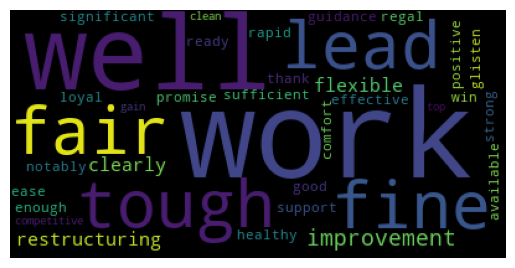

In [44]:
#separating positive words

with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
#positive words wordcloud
pos_words = " ".join([w for w in dup_lst if w in poswords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(pos_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

print(len(pos_words))
print(pos_words)

1925


'negative difficult grapple depressed ignore warning issue warning loss fall fall violate lie loss negative fall interrupt loss breakup fall sharply overshadow weak damage cry decline fail boycott refuse redundant interrupt fall fall fall drag poor invalid dispute fall loss layoff problem issue warning fall layoff fall loss loss loss loss weak decline loss negative suffer fall redundant frost lie loss loss threaten expire embroil disagreement fall issue steal rival blame loss weak fall weaken badly lose loss weak uncertain loss decline negative lose loss loss loss redundant fall threat slump poor decline upset loose concern decline loss hurt fall decline loose decline issue warning loss loss loss loss struggle slow strike strike damaging disappointment fall loss injury issue warning poor loss loss loss decline loss loss unstable warning rival fall fall loss lose strike loss loss slow loss fall fall loss loss downgrade fall fall redundant burden loss leak issue warning burden dark lose 

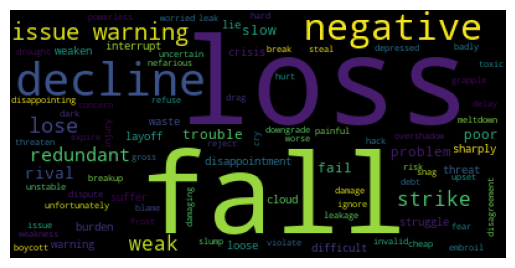

In [45]:
#separating negative words

with open("negative-words.txt","r") as pos:
    negwords = pos.read().split("\n")
    
#positive words wordcloud
neg_words = " ".join([w for w in dup_lst if w in negwords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(neg_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

print(len(neg_words))
neg_words

In [46]:
# # majority of words in duplicated records are negative (1704) and only 389 words are positive
# so we can say, out of 507 records most of the records might have negative sentiment

# now we will analyse sentiment of duplicated records by using polarity score concept

In [47]:
# let's find out information from partial duplicated records using polarity score

In [48]:
data_falsedup['p_score'] = data_falsedup['Sentence'].apply(lambda x : sia.polarity_scores(x))
data_falsedup['c_score'] = data_falsedup['p_score'].apply(lambda scores: scores['compound'])
data_falsedup.head()

Sentence Sentiment  \
7    ssh communications security corp stock exchan...  negative   
13                vike line have cancel some service    neutral   
41   dolce gabbana have ask the european union to ...  negative   
57   dilute earning per share eps fall to eur from...   neutral   
66   finnish geosentric s net sale decrease to eur...  negative   

                                              p_score  c_score  
7   {'neg': 0.073, 'neu': 0.852, 'pos': 0.076, 'co...   0.0258  
13  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...  -0.2500  
41  {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'comp...  -0.4019  
57  {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...   0.2960  
66  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000

In [49]:
def get_sentiment(value):
    if value < 0:
        return 'negative'
    elif value > 0:
        return 'positive'
    else:
        return 'neutral'
    
data_falsedup['Sentiment'] = data_falsedup['c_score'].apply(get_sentiment)
data_falsedup.head()

Sentence Sentiment  \
7    ssh communications security corp stock exchan...  positive   
13                vike line have cancel some service   negative   
41   dolce gabbana have ask the european union to ...  negative   
57   dilute earning per share eps fall to eur from...  positive   
66   finnish geosentric s net sale decrease to eur...   neutral   

                                              p_score  c_score  
7   {'neg': 0.073, 'neu': 0.852, 'pos': 0.076, 'co...   0.0258  
13  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...  -0.2500  
41  {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'comp...  -0.4019  
57  {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...   0.2960  
66  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   0.0000

In [50]:
data_falsedup['Sentiment'].value_counts()

positive    436
negative    316
neutral     261
Name: Sentiment, dtype: int64

In [51]:
del data_falsedup['p_score']
del data_falsedup['c_score']

In [52]:
data_falsedup = data_falsedup.drop_duplicates()
data_falsedup.shape

(506, 2)

In [53]:
# droping the partial duplicates and concating original data free from partial duplicates and data_falsedup after performing polarity

In [54]:
data=data.drop_duplicates(subset=['Sentence'],keep = False)
data.shape

(4765, 2)

In [55]:
data = pd.concat([data, data_falsedup], axis=0)
data.shape

(5271, 2)

# Removing stop words

In [56]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [57]:
stop = nltk.download('stopwords')  # Downloading stop words
stop = set(stopwords.words('english'))  # Selecting English stop words
data['Sentence'] = data['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bodak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentence Sentiment
0  geosolution technology leverage benefon gps so...  positive
1                        esi low bk real possibility  negative
2  last quarter componenta net sale double eur eu...  positive
3  accord finnish russian chamber commerce major ...   neutral
4  swedish buyout firm sell remain percent stake ...   neutral

# 4.Wordcloud

In [58]:
grouped = data.groupby(data.Sentiment)
data_pos = grouped.get_group("positive")
data_neg = grouped.get_group("negative")
data_neu = grouped.get_group("neutral")

In [59]:
def convert(lst):
    return ''.join(lst).split()

 
pos_lst =  convert(data_pos.Sentence)
neg_lst =  convert(data_neg.Sentence)
neu_lst =  convert(data_neu.Sentence)
#pos_lst

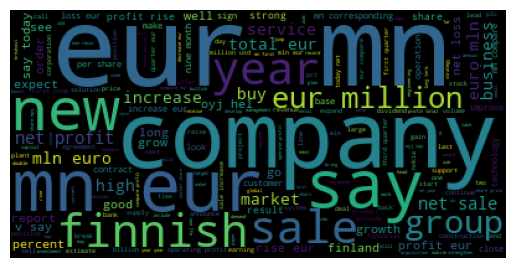

In [60]:
#wordcloud for positive sentiment

wc_pos = " ".join([w for w in pos_lst])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(wc_pos)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [61]:
print(cloud.words_.keys())

dict_keys(['eur mn', 'company', 'mn eur', 'say', 'new', 'year', 'sale', 'finnish', 'group', 'eur million', 'net profit', 'net sale', 'increase', 'mln euro', 'service', 'buy', 'total eur', 'market', 'high', 'euro mln', 'business', 'profit eur', 'say today', 'percent', 'expect', 'rise eur', 'long', 'see', 'go', 'report', 'well', 'oyj hel', 'growth', 'finland', 'grow', 'good', 'order', 'v say', 'net loss', 'profit rise', 'result', 'share', 'strong', 'mn corresponding', 'loss eur', 'improve', 'per share', 'increase eur', 'technology', 'make', 'sign', 'nine month', 'mn compare', 'operation', 'contract', 'base', 'look', 'close', 'customer', 'operating profit', 'solution', 'price', 'product', 'win', 'billion', 'agreement', 'line', 'sell', 'estimate', 'stock', 'million usd', 'cost', 'day', 'plc', 'supply', 'third quarter', 'break', 'financial', 'volume', 'expand', 'time', 'continue', 'bank', 'system', 'end', 'support', 'eur compare', 'mln eur', 'sale increase', 'quarter eur', 'revenue', 'offer

In [62]:
from collections import Counter
word_set = wc_pos
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('eur', 762), ('profit', 316), ('mn', 308), ('net', 220), ('say', 219), ('year', 215), ('company', 207), ('sale', 206), ('million', 172), ('mln', 164), ('increase', 158), ('share', 127), ('quarter', 119), ('finnish', 113), ('oyj', 113), ('euro', 112), ('loss', 106), ('rise', 106), ('first', 101), ('group', 100), ('compare', 99), ('today', 89), ('total', 86), ('new', 83), ('corresponding', 78), ('service', 78), ('market', 78), ('period', 76), ('buy', 75), ('percent', 70), ('long', 70), ('month', 66), ('business', 65), ('high', 63), ('order', 62), ('expect', 61), ('per', 60), ('hel', 60), ('contract', 59), ('price', 58), ('solution', 55), ('v', 55), ('also', 54), ('operation', 53), ('grow', 51), ('third', 51), ('sign', 51), ('operating', 50), ('finland', 48), ('report', 48)]


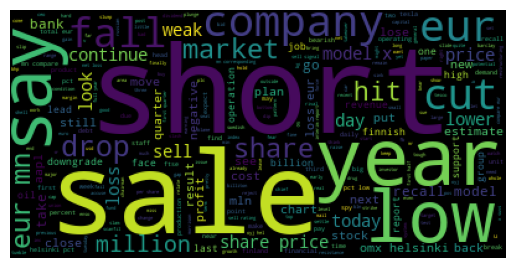

In [63]:
#wordcloud for negative sentiment

wc_neg = " ".join([w for w in neg_lst])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(wc_neg)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [64]:
print(cloud.words_.keys())

dict_keys(['short', 'sale', 'year', 'low', 'say', 'company', 'eur', 'cut', 'fall', 'drop', 'share', 'market', 'eur mn', 'hit', 'million', 'share price', 'day', 'price', 'weak', 'today', 'loss', 'lower', 'look', 'model x', 'continue', 'sell', 'recall model', 'go', 'bank', 'take', 'omx helsinki', 'still', 'back', 'new', 'see', 'cost', 'result', 'put', 'plan', 'close', 'aapl', 'stock', 'mln', 'move', 'estimate', 'negative', 'loss eur', 'lose', 'quarter', 'profit', 'chart', 'next', 'downgrade', 'one', 'job', 'finnish', 'operation', 'billion', 'revenue', 'face', 'high', 'lead', 'oil', 'support', 'group', 'report', 'last', 'mn compare', 'helsinki pct', 'recall', 'find', 'make', 'big', 'bearish', 'time', 'may', 'two', 'percent', 'staff', 'production', 'unit', 'u', 'due', 'demand', 'operating', 'pct low', 'first', 'g', 'pay', 'spy', 'daily', 'ftse', 'point', 'debt', 'near', 'pct', 'break', 'head', 'tesla', 'week', 'product', 'third', 'financial', 'finland', 'expect', 'total eur', 'mn correspon

In [65]:
from collections import Counter
word_set = wc_neg
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('eur', 63), ('share', 42), ('short', 35), ('year', 35), ('price', 34), ('low', 32), ('sale', 31), ('loss', 30), ('say', 24), ('sell', 23), ('company', 22), ('cut', 21), ('pct', 21), ('recall', 20), ('fall', 20), ('drop', 20), ('market', 19), ('mn', 19), ('hit', 18), ('million', 18), ('get', 17), ('x', 17), ('day', 17), ('I', 17), ('model', 15), ('weak', 15), ('today', 15), ('first', 14), ('lower', 14), ('helsinki', 14), ('quarter', 13), ('look', 13), ('continue', 13), ('aapl', 13), ('stock', 13), ('go', 12), ('bank', 12), ('take', 12), ('report', 12), ('omx', 12), ('still', 11), ('back', 11), ('see', 11), ('cost', 11), ('result', 11), ('put', 10), ('plan', 10), ('like', 10), ('close', 10), ('mln', 10)]


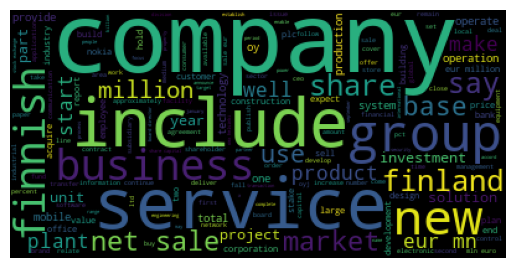

In [66]:
#wordcloud for neutral sentiment

wc_neu = " ".join([w for w in neu_lst])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(wc_neu)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [67]:
print(cloud.words_.keys())

dict_keys(['company', 'service', 'include', 'group', 'new', 'business', 'finnish', 'finland', 'share', 'say', 'market', 'net sale', 'base', 'use', 'million', 'product', 'plant', 'eur mn', 'make', 'well', 'start', 'investment', 'project', 'unit', 'part', 'solution', 'year', 'operation', 'system', 'oy', 'production', 'provide', 'total', 'technology', 'one', 'mobile', 'operate', 'corporation', 'value', 'sell', 'nokia', 'customer', 'build', 'plan', 'construction', 'expect', 'eur million', 'design', 'price', 'end', 'employee', 'acquire', 'industry', 'hold', 'building', 'two', 'office', 'plc', 'large', 'stake', 'bank', 'development', 'report', 'approximately', 'financial', 'management', 'order', 'first', 'cover', 'eur', 'transfer', 'electronic', 'information', 'communication', 'shareholder', 'contract', 'deal', 'offer', 'sale eur', 'area', 'mln euro', 'ceo', 'medium', 'paper', 'software', 'oyj', 'application', 'number', 'facility', 'develop', 'fall', 'continue', 'remain', 'take', 'time', 'gl

In [68]:
from collections import Counter
word_set = wc_neu
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('company', 382), ('eur', 349), ('share', 224), ('sale', 200), ('service', 162), ('say', 155), ('finland', 151), ('business', 151), ('include', 148), ('group', 143), ('new', 140), ('market', 136), ('million', 134), ('finnish', 121), ('also', 110), ('net', 110), ('mn', 91), ('base', 90), ('total', 88), ('plant', 86), ('product', 83), ('use', 82), ('unit', 80), ('mln', 80), ('investment', 78), ('euro', 77), ('oyj', 76), ('make', 73), ('solution', 73), ('year', 72), ('bank', 72), ('report', 70), ('well', 70), ('mobile', 70), ('operate', 69), ('production', 69), ('capital', 68), ('start', 68), ('operation', 68), ('helsinki', 66), ('part', 65), ('project', 64), ('stock', 64), ('nokia', 64), ('expect', 64), ('system', 64), ('board', 63), ('corporation', 62), ('financial', 61), ('contract', 60)]


In [69]:
#positive words wordcloud for positive sentiment

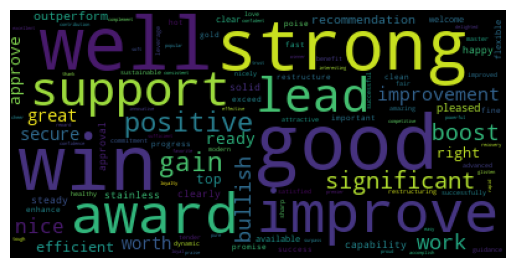

In [70]:
#separating positive words

with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
#positive words wordcloud
pos_words = " ".join([w for w in pos_lst if w in poswords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(pos_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [71]:
print(len(pos_words))
pos_words

6545


'leverage powerful top premier tender welcome restructuring competitive winning lead top clearly improve like gold complement secure gain premier stainless loyal great glad ready positive poise nice good sharp happy right efficient bullish positive successful recovery well gain lead enhance work surpass promise boost strong award approve advanced boost well fresh capability bullish enhance dynamic positive good flexible win miracle support like lead improve saint strong secure boost master master innovative efficient boost well support sustainable happy nice succeed well gain well like nice gain enhance capability approve award significant strong improve recover progress well steady support outperform tough award significant loyalty work significant soft commitment good award win prefer pure pleased confidence secure ready peace successfully win lead boost gain support dynamic support realistic great love improve positive improve win support award good leverage recovery outperform win 

In [72]:
print(cloud.words_.keys())

dict_keys(['win', 'good', 'well', 'strong', 'improve', 'award', 'support', 'lead', 'positive', 'gain', 'significant', 'boost', 'bullish', 'work', 'nice', 'improvement', 'secure', 'great', 'worth', 'ready', 'approve', 'right', 'efficient', 'top', 'outperform', 'recommendation', 'pleased', 'clearly', 'stainless', 'happy', 'capability', 'steady', 'approval', 'solid', 'welcome', 'flexible', 'available', 'clear', 'gold', 'poise', 'enhance', 'promise', 'progress', 'success', 'important', 'hot', 'fine', 'fast', 'exceed', 'clean', 'restructure', 'leverage', 'tender', 'restructuring', 'sharp', 'successful', 'advanced', 'dynamic', 'master', 'sustainable', 'commitment', 'successfully', 'love', 'improved', 'attractive', 'amazing', 'nicely', 'benefit', 'healthy', 'satisfied', 'modern', 'guidance', 'fair', 'powerful', 'premier', 'competitive', 'complement', 'loyal', 'recovery', 'surpass', 'innovative', 'tough', 'loyalty', 'soft', 'pure', 'confidence', 'popular', 'trust', 'excellent', 'rapid', 'easy'

In [73]:
from collections import Counter
word_set = pos_words
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('win', 48), ('good', 46), ('well', 43), ('strong', 38), ('improve', 37), ('award', 34), ('lead', 26), ('positive', 26), ('support', 26), ('gain', 23), ('significant', 19), ('boost', 17), ('like', 16), ('bullish', 16), ('work', 16), ('nice', 15), ('improvement', 14), ('secure', 13), ('great', 13), ('worth', 13), ('ready', 11), ('approve', 11), ('right', 10), ('efficient', 10), ('top', 9), ('outperform', 8), ('recommendation', 8), ('pleased', 7), ('clearly', 6), ('stainless', 6), ('happy', 6), ('capability', 6), ('steady', 6), ('approval', 6), ('solid', 6), ('welcome', 5), ('flexible', 5), ('available', 5), ('clear', 5), ('gold', 4), ('poise', 4), ('enhance', 4), ('promise', 4), ('progress', 4), ('success', 4), ('important', 4), ('hot', 4), ('fine', 4), ('fast', 4), ('exceed', 4)]


In [74]:
#negative words wordcloud for positive sentiment

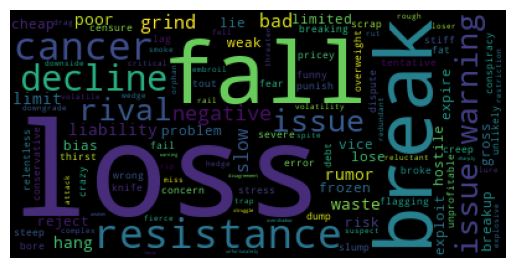

In [75]:
with open("negative-words.txt","r") as pos:
    negwords = pos.read().split("\n")
    
#negative word cloud
neg_words = " ".join([w for w in pos_lst if w in negwords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 200, stopwords = set(STOPWORDS))
cloud

cloud.generate(neg_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [76]:
print(len(neg_words))
neg_words

2236


'loss issue loss dispute crazy resistance weak break issue loss break lie tentative relentless flagging loss break loss scrap loss break break weak loss loss vice dump loss slow rival limited debt fear break loss rival negative limit wrong resistance break cancer fall knife break loss gross rumor loss grind stress break decline loss cancer rumor loss fail rival lag exploit bad liability liability broke rumor grind break concern problem hostile breaking loss loss steep loss funny cheap bore lose severe expire loss negative rival negative reject pricey break break creep breakup tout poor punish conspiracy break resistance overweight loss resistance bad censure unprofitable thirst loss break reject hostile loss conservative poor break loss unlikely resistance break stiff resistance loss bad error fall loss limit liability fat waste break break risk break slump break loss cancer volatility reluctant loss fall cancer loss poor loss fall wedge loss rail break hang loss rip bad fall loss loss

In [77]:
from collections import Counter
word_set = neg_words
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('loss', 106), ('fall', 34), ('break', 28), ('issue', 12), ('resistance', 10), ('cancer', 9), ('decline', 8), ('warning', 7), ('rival', 6), ('negative', 5), ('slow', 4), ('grind', 4), ('bad', 4), ('limit', 3), ('rumor', 3), ('liability', 3), ('poor', 3), ('waste', 3), ('hang', 3), ('weak', 2), ('lie', 2), ('vice', 2), ('limited', 2), ('gross', 2), ('exploit', 2), ('problem', 2), ('hostile', 2), ('cheap', 2), ('lose', 2), ('expire', 2), ('reject', 2), ('breakup', 2), ('risk', 2), ('bias', 2), ('frozen', 2), ('dispute', 1), ('crazy', 1), ('tentative', 1), ('relentless', 1), ('flagging', 1), ('scrap', 1), ('dump', 1), ('debt', 1), ('fear', 1), ('wrong', 1), ('knife', 1), ('stress', 1), ('fail', 1), ('lag', 1), ('broke', 1)]


In [78]:
#  positive words wordcloud for negative sentiment

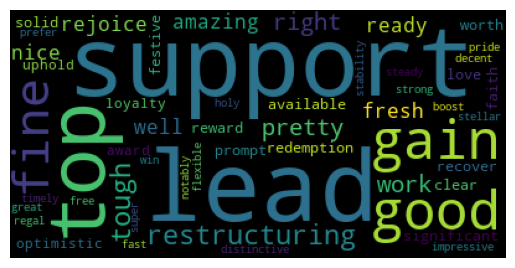

In [79]:
#separating positive words

with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
#positive words wordcloud
pos_words = " ".join([w for w in neg_lst if w in poswords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(pos_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [80]:
print(len(pos_words))
pos_words

719


'ready pretty work like worth lead lead significant top support faith gain good prompt recover lead festive good good right available like redemption clear solid like reward support fine top good like like good love restructuring nice right support right optimistic like like loyalty fine gain fresh nice uphold award amazing support like distinctive lead pride ready pretty timely win great support top support top lead stability well steady gain tough lead boost amazing holy super like stellar free restructuring top rejoice rejoice gain impressive work support like fresh support fine gain decent pretty prefer fast tough strong lead tough work tough well notably regal restructuring fine lead flexible restructuring'

In [81]:
from collections import Counter
word_set = pos_words
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('like', 10), ('lead', 8), ('support', 8), ('top', 5), ('gain', 5), ('good', 5), ('fine', 4), ('restructuring', 4), ('tough', 4), ('pretty', 3), ('work', 3), ('right', 3), ('ready', 2), ('nice', 2), ('fresh', 2), ('amazing', 2), ('well', 2), ('rejoice', 2), ('worth', 1), ('significant', 1), ('faith', 1), ('prompt', 1), ('recover', 1), ('festive', 1), ('available', 1), ('redemption', 1), ('clear', 1), ('solid', 1), ('reward', 1), ('love', 1), ('optimistic', 1), ('loyalty', 1), ('uphold', 1), ('award', 1), ('distinctive', 1), ('pride', 1), ('timely', 1), ('win', 1), ('great', 1), ('stability', 1), ('steady', 1), ('boost', 1), ('holy', 1), ('super', 1), ('stellar', 1), ('free', 1), ('impressive', 1), ('decent', 1), ('prefer', 1), ('fast', 1)]


In [82]:
# negative words wordcloud for negative sentiment

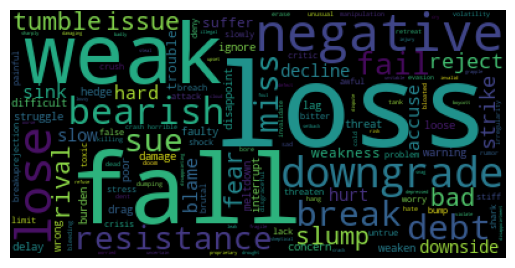

In [83]:
with open("negative-words.txt","r") as pos:
    negwords = pos.read().split("\n")
    
#negative word cloud
neg_words = " ".join([w for w in neg_lst if w in negwords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 200, stopwords = set(STOPWORDS))
cloud

cloud.generate(neg_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [84]:
print(len(neg_words))
neg_words

2127


'disappoint problem brutal lose lag crisis hard weak slump rejection fall breach issue weaken resistance threaten fall sink struggle stress sue fall toxic fall bearish shark weak debt hedge downgrade miss miss sue untrue damage bad issue tumble worry hedge loss crush bad wrong ignore slump debt fear shock accuse tumble warning slowly fall awful weak weak drag blame rival stiff fear loss break downgrade downgrade weak fall limit breakup miss loss weak sue break bump decline resistance fall fail critic painful downside faulty sue resistance disappoint bitter lack reject weak downgrade attack delay weak false deny volatility erase manipulation faulty fall evasion meltdown sink fail weak downgrade sad rumor retreat unusual accuse hurt fall slow cold dent break tank irregularity bearish lag dead bloated disgraceful fall downgrade reject bearish bad blame rival issue sink threat lose debt fall invalidate fall bearish hurt weak doom dumping fall bearish crash lose downgrade reject sue hang fa

In [85]:
from collections import Counter
word_set = neg_words
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('loss', 30), ('fall', 20), ('weak', 15), ('negative', 10), ('lose', 9), ('downgrade', 9), ('bearish', 7), ('debt', 6), ('break', 6), ('resistance', 5), ('sue', 5), ('miss', 5), ('fail', 5), ('slump', 4), ('issue', 4), ('bad', 4), ('tumble', 4), ('fear', 4), ('rival', 4), ('reject', 4), ('strike', 4), ('hard', 3), ('sink', 3), ('accuse', 3), ('blame', 3), ('decline', 3), ('downside', 3), ('hurt', 3), ('slow', 3), ('weakness', 3), ('suffer', 3), ('trouble', 3), ('disappoint', 2), ('lag', 2), ('weaken', 2), ('struggle', 2), ('hedge', 2), ('damage', 2), ('wrong', 2), ('ignore', 2), ('warning', 2), ('drag', 2), ('faulty', 2), ('delay', 2), ('meltdown', 2), ('threat', 2), ('concern', 2), ('interrupt', 2), ('loose', 2), ('difficult', 2)]


In [86]:
#positive words wordcloud for neutral sentiment

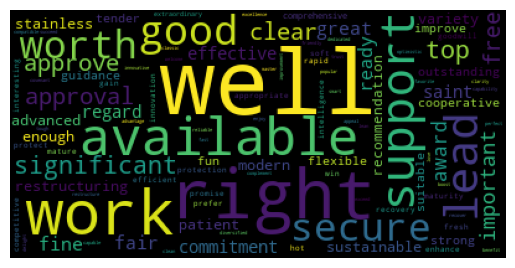

In [87]:
#separating positive words

with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
#positive words wordcloud
pos_words = " ".join([w for w in neu_lst if w in poswords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
cloud

cloud.generate(pos_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [88]:
print(len(pos_words))
pos_words

5264


'right soft fresh efficient work lead recommendation appropriate delight fresh commitment right right favorable dominate clear perfect gain good great good secure ready lead works lead thank fair right available clear worth significant appeal well guidance flexibility important support integrated regard hot saint well right like well capable genius sustainability work support support lean lean boost available approval intriguing support clear right well lead effective available restructuring stainless good work approve approval guidance celebrate diligence effective encourage available award win free free worth effective patient outstanding master covenant regard fine lead intelligence cornerstone award approval easy lead assurance protect recommend secure fortitude support clarity well right colorful well advantage win impressive benefit secure versatile beneficiary important strong lead secure skilled right recovery support regard appropriate maturity support ready tender secure soli

In [89]:
from collections import Counter
word_set = pos_words
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('well', 70), ('right', 36), ('work', 29), ('available', 29), ('support', 23), ('lead', 22), ('good', 17), ('secure', 15), ('worth', 15), ('significant', 11), ('top', 11), ('clear', 10), ('approval', 10), ('approve', 10), ('like', 9), ('free', 9), ('important', 8), ('award', 7), ('great', 6), ('ready', 6), ('fair', 6), ('fine', 6), ('commitment', 5), ('regard', 5), ('saint', 5), ('effective', 5), ('restructuring', 5), ('stainless', 5), ('patient', 5), ('variety', 5), ('advanced', 5), ('enough', 5), ('sustainable', 5), ('modern', 5), ('recommendation', 4), ('guidance', 4), ('outstanding', 4), ('strong', 4), ('tender', 4), ('cooperative', 4), ('flexible', 4), ('improve', 4), ('fun', 4), ('suitable', 4), ('comprehensive', 4), ('soft', 3), ('fresh', 3), ('efficient', 3), ('appropriate', 3), ('gain', 3)]


In [90]:
#negative words wordcloud for neutral sentiment

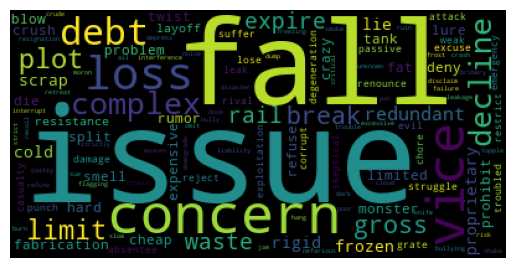

In [91]:
with open("negative-words.txt","r") as pos:
    negwords = pos.read().split("\n")
    
#negative word cloud
neg_words = " ".join([w for w in neu_lst if w in negwords])

#maskarray = np.array(Image.open("butterfly.png"))   mask = maskarray,
cloud = WordCloud(background_color = "black", max_words = 200, stopwords = set(STOPWORDS))
cloud

cloud.generate(neg_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [92]:
print(len(neg_words))
neg_words

2121


'gross rumor scrap debt rail vice complex passive cheap renounce casualty split complex die die issue lose concern struggle waste restrict frozen gross loss concern issue exploitation weak issue issue vice fall vice issue problem deny fall decline rigid limit issue loss damage vice proprietary grate concern issue waste loss scrap loss issue rival absentee issue vice troubled issue rail fall concern evil degeneration loss issue attack fall smell smell issue break prohibit concern gross punch concern limited break problem excuse fat issue fall monster prohibit rumor fat expire concern issue loss proprietary vice lie chore issue tank reject plot rail concern concern suffer issue cold skeptical debt emergency corrupt loss crazy leak issue interrupt concern disaster vice frost interference noise concern loss issue disclaim liability break vice unknown loss issue limit waste hard fall concern doom resignation scrap debt expire concern poor weaken refuse plot omit shake debt lure depress conc

In [93]:
from collections import Counter
word_set = neg_words
word_list = word_set.split()

word_count = Counter(word_list)

print(word_count.most_common(50))

[('issue', 42), ('fall', 32), ('concern', 20), ('vice', 17), ('loss', 13), ('debt', 8), ('complex', 8), ('decline', 8), ('limit', 6), ('plot', 6), ('gross', 5), ('break', 5), ('rail', 4), ('waste', 4), ('expire', 4), ('redundant', 4), ('scrap', 3), ('frozen', 3), ('rigid', 3), ('proprietary', 3), ('lie', 3), ('cold', 3), ('rumor', 2), ('cheap', 2), ('split', 2), ('die', 2), ('problem', 2), ('deny', 2), ('smell', 2), ('prohibit', 2), ('limited', 2), ('fat', 2), ('monster', 2), ('tank', 2), ('crazy', 2), ('hard', 2), ('refuse', 2), ('lure', 2), ('fabrication', 2), ('blow', 2), ('crush', 2), ('expensive', 2), ('twist', 2), ('resistance', 2), ('layoff', 2), ('passive', 1), ('renounce', 1), ('casualty', 1), ('lose', 1), ('struggle', 1)]


# 5.Feature Extraction

In [94]:
# #export dataframe to excel
# from sklearn.feature_extraction.text import CountVectorizer
# DataFrame_name = pd.DataFrame(CountVectorizer.get_feature_names_out(self=))

# #pip install openpyxl
# writer = pd.ExcelWriter('converted-to-excel.xlsx')
# DataFrame_name.to_excel(writer)
# writer.save()

# Count Vectorizer(Unigram)

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,1))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x1 = vectorizer.fit_transform(data['Sentence'])

In [96]:
print(vectorizer.get_feature_names_out()[0:100])

['aa' 'aal' 'aaland' 'aalto' 'aaltonen' 'aapl' 'aaron' 'aava' 'aazhang'
 'ab' 'abandon' 'abb' 'abbott' 'abbv' 'abc' 'aberdeen' 'aberration'
 'abidjan' 'ability' 'able' 'abloy' 'abn' 'aboavista' 'abov' 'abp'
 'abramov' 'abramovich' 'abroad' 'absentee' 'absolut' 'ac' 'aca' 'acad'
 'academic' 'acanb' 'acando' 'accelerate' 'accept' 'access' 'accessory'
 'accident' 'accommodate' 'accommodation' 'accomplish' 'accord'
 'accordance' 'accordingly' 'account' 'accountant' 'accounting' 'accrue'
 'accumulate' 'accumulation' 'accuse' 'ace' 'acerta' 'acg' 'achieve'
 'achievement' 'acid' 'ackman' 'acknowledge' 'acnielsen' 'acom' 'acquire'
 'acquirer' 'acquisition' 'acquit' 'across' 'acs' 'act' 'actelion'
 'action' 'activate' 'activation' 'active' 'actively' 'activeness'
 'activision' 'activity' 'actor' 'actual' 'actually' 'ad' 'adac' 'adak'
 'adams' 'adanac' 'adate' 'adbe' 'add' 'addiction' 'addition' 'additional'
 'additionally' 'address' 'addus' 'ade' 'adequacy' 'adidas']


In [97]:
x1.shape

(5271, 8146)

In [98]:
pd.DataFrame(x1.toarray()) 

0     1     2     3     4     5     6     7     8     9     ...  8136  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
5266     0     0     0     0     0     0     0     0     0     0  ...     0   
5267     0     0     0     0     0     0     0     0     0     0  ...     0   
5268     0     0     0     0     0     0     0     0     0     0  ...     0   
5269     0     0     0     0     0     0     0     0     0     0  ...     0   
5270     0     0     0     0     0     0     0     0     0     0  ...     0   

      8137  8138  8139  8140  8141  8142  8143  8144  8145  
0        0     0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2        0     0     0     0     0     0     0     0     0  
3        0     0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
5266     0     0     0     0     0     0     0     0     0  
5267     0     0     0     0     0     0     0     0     0  
5268     0     0     0     0     0     0     0     0     0  
5269     0     0     0     0     0     0     0     0     0  
5270     0     0     0     0     0     0     0     0     0  

[5271 rows x 8146 columns]

In [99]:
def plot_top_ngrams_barchart(text, n=1):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

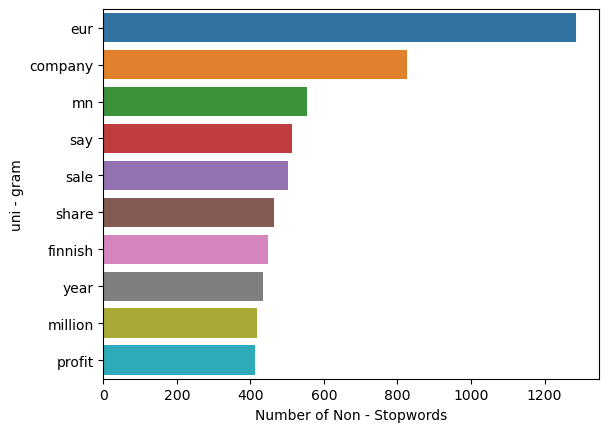

In [100]:
plot_top_ngrams_barchart(data['Sentence'],1)

plt.xlabel('Number of Non - Stopwords')
plt.ylabel('uni - gram')
plt.show()

# count vectorizer(bigram)

In [101]:
# #export dataframe to excel

# #pip install openpyxl
# writer = pd.ExcelWriter('converted-to-excel.xlsx')
# DataFrame_name.to_excel(writer)
# writer.save()

In [102]:
vectorizer = CountVectorizer(ngram_range=(2,2))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x2 = vectorizer.fit_transform(data['Sentence'])

In [103]:
x2.shape

(5271, 38659)

In [104]:
pd.DataFrame(x2.toarray())

0      1      2      3      4      5      6      7      8      9      \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266      0      0      0      0      0      0      0      0      0      0   
5267      0      0      0      0      0      0      0      0      0      0   
5268      0      0      0      0      0      0      0      0      0      0   
5269      0      0      0      0      0      0      0      0      0      0   
5270      0      0      0      0      0      0      0      0      0      0   

      ...  38649  38650  38651  38652  38653  38654  38655  38656  38657  \
0     ...      0      0      0      0      0      0      0      0      0   
1     ...      0      0      0      0      0      0      0      0      0   
2     ...      0      0      0      0      0      0      0      0      0   
3     ...      0      0      0      0      0      0      0      0      0   
4     ...      0      0      0      0      0      0      0      0      0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266  ...      0      0      0      0      0      0      0      0      0   
5267  ...      0      0      0      0      0      0      0      0      0   
5268  ...      0      0      0      0      0      0      0      0      0   
5269  ...      0      0      0      0      0      0      0      0      0   
5270  ...      0      0      0      0      0      0      0      0      0   

      38658  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
5266      0  
5267      0  
5268      0  
5269      0  
5270      0  

[5271 rows x 38659 columns]

In [105]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

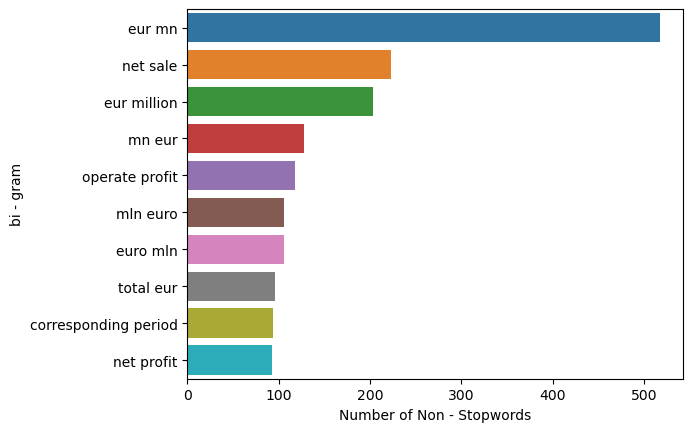

In [106]:
plot_top_ngrams_barchart(data['Sentence'],2)

plt.xlabel('Number of Non - Stopwords')
plt.ylabel('bi - gram')
plt.show()

# count vectorizer(Trigram)

In [107]:
vectorizer = CountVectorizer(ngram_range=(3,3))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x3 = vectorizer.fit_transform(data['Sentence'])

In [108]:
x3.shape

(5271, 42393)

In [109]:
pd.DataFrame(x3.toarray())

0      1      2      3      4      5      6      7      8      9      \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266      0      0      0      0      0      0      0      0      0      0   
5267      0      0      0      0      0      0      0      0      0      0   
5268      0      0      0      0      0      0      0      0      0      0   
5269      0      0      0      0      0      0      0      0      0      0   
5270      0      0      0      0      0      0      0      0      0      0   

      ...  42383  42384  42385  42386  42387  42388  42389  42390  42391  \
0     ...      0      0      0      0      0      0      0      0      0   
1     ...      0      0      0      0      0      0      0      0      0   
2     ...      0      0      0      0      0      0      0      0      0   
3     ...      0      0      0      0      0      0      0      0      0   
4     ...      0      0      0      0      0      0      0      0      0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266  ...      0      0      0      0      0      0      0      0      0   
5267  ...      0      0      0      0      0      0      0      0      0   
5268  ...      0      0      0      0      0      0      0      0      0   
5269  ...      0      0      0      0      0      0      0      0      0   
5270  ...      0      0      0      0      0      0      0      0      0   

      42392  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
5266      0  
5267      0  
5268      0  
5269      0  
5270      0  

[5271 rows x 42393 columns]

In [110]:
def plot_top_ngrams_barchart(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

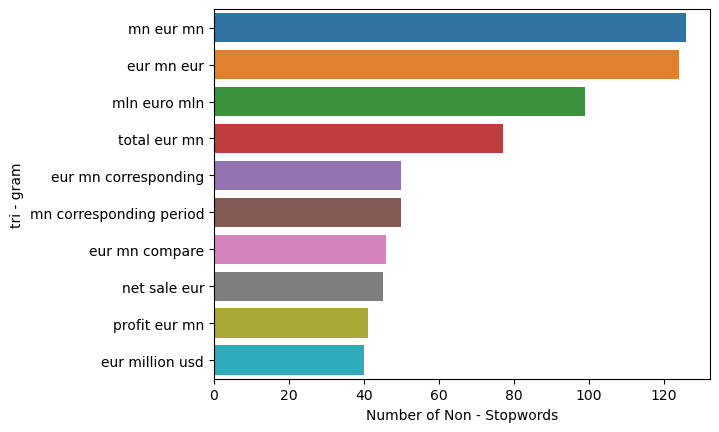

In [111]:
plot_top_ngrams_barchart(data['Sentence'],3)

plt.xlabel('Number of Non - Stopwords')
plt.ylabel('tri - gram')
plt.show()

# CountVectorizer(Unigram+Trigram)

In [112]:
vectorizer = CountVectorizer(ngram_range=(1,3))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x4 = vectorizer.fit_transform(data['Sentence'])

In [113]:
x4.shape

(5271, 89198)

In [114]:
pd.DataFrame(x4.toarray())

0      1      2      3      4      5      6      7      8      9      \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266      0      0      0      0      0      0      0      0      0      0   
5267      0      0      0      0      0      0      0      0      0      0   
5268      0      0      0      0      0      0      0      0      0      0   
5269      0      0      0      0      0      0      0      0      0      0   
5270      0      0      0      0      0      0      0      0      0      0   

      ...  89188  89189  89190  89191  89192  89193  89194  89195  89196  \
0     ...      0      0      0      0      0      0      0      0      0   
1     ...      0      0      0      0      0      0      0      0      0   
2     ...      0      0      0      0      0      0      0      0      0   
3     ...      0      0      0      0      0      0      0      0      0   
4     ...      0      0      0      0      0      0      0      0      0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266  ...      0      0      0      0      0      0      0      0      0   
5267  ...      0      0      0      0      0      0      0      0      0   
5268  ...      0      0      0      0      0      0      0      0      0   
5269  ...      0      0      0      0      0      0      0      0      0   
5270  ...      0      0      0      0      0      0      0      0      0   

      89197  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
5266      0  
5267      0  
5268      0  
5269      0  
5270      0  

[5271 rows x 89198 columns]

# TF-IDF unigram

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['Sentence'])

In [116]:
tfidf.shape

(5271, 8146)

In [117]:
pd.DataFrame(tfidf.toarray())

0     1     2     3     4     5     6     7     8     9     ...  8136  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
5266   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5267   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5268   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5269   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5270   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      8137  8138  8139  8140  8141  8142  8143  8144  8145  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
5266   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5267   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5268   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5269   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5270   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5271 rows x 8146 columns]

# TF-IDF bigram

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2))

tfidf = vectorizer.fit_transform(data['Sentence'])

In [119]:
tfidf.shape

(5271, 38659)

In [120]:
pd.DataFrame(tfidf.toarray())

0      1      2      3      4      5      6      7      8      9      \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5267    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5268    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5269    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5270    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  38649  38650  38651  38652  38653  38654  38655  38656  38657  \
0     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5267  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5268  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5269  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5270  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      38658  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
5266    0.0  
5267    0.0  
5268    0.0  
5269    0.0  
5270    0.0  

[5271 rows x 38659 columns]

# TfIDF Trigram

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(3,3))

tfidf = vectorizer.fit_transform(data['Sentence'])

In [122]:
tfidf.shape

(5271, 42393)

In [123]:
pd.DataFrame(tfidf.toarray())

0      1      2      3      4      5      6      7      8      9      \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5267    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5268    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5269    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5270    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  42383  42384  42385  42386  42387  42388  42389  42390  42391  \
0     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5267  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5268  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5269  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5270  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      42392  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
5266    0.0  
5267    0.0  
5268    0.0  
5269    0.0  
5270    0.0  

[5271 rows x 42393 columns]

# TFIDF(Unigram+Trigram)

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3))

tfidf = vectorizer.fit_transform(data['Sentence'])

In [125]:
tfidf.shape

(5271, 89198)

In [126]:
pd.DataFrame(tfidf.toarray())

0      1      2      3      4      5      6      7      8      9      \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5267    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5268    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5269    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5270    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  89188  89189  89190  89191  89192  89193  89194  89195  89196  \
0     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5266  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5267  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5268  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5269  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5270  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      89197  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
5266    0.0  
5267    0.0  
5268    0.0  
5269    0.0  
5270    0.0  

[5271 rows x 89198 columns]

# 6.Model Building

In [127]:
data

Sentence Sentiment
0     geosolution technology leverage benefon gps so...  positive
1                           esi low bk real possibility  negative
2     last quarter componenta net sale double eur eu...  positive
3     accord finnish russian chamber commerce major ...   neutral
4     swedish buyout firm sell remain percent stake ...   neutral
...                                                 ...       ...
5422  finnish electronic contract manufacturer scanf...   neutral
5448  finnish medium group talentum issue profit war...  positive
5472  large restructuring plan italy negotiation job...  negative
5550  negotiation result reduction people regular em...   neutral
5570    last year million passenger fly airline percent   neutral

[5271 rows x 2 columns]

# 6.1 Using CountVectorizer

In [128]:
#Creating Bag of Words

In [129]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [130]:
cv= CountVectorizer(ngram_range=(1, 3), max_features=10000)
X = cv.fit_transform(data['Sentence']).toarray()

In [131]:
data['Sentiment'].replace({'positive':1,'negative':-1,'neutral':0},inplace=True)

In [132]:
y = data['Sentiment']
y

0       1
1      -1
2       1
3       0
4       0
       ..
5422    0
5448    1
5472   -1
5550    0
5570    0
Name: Sentiment, Length: 5271, dtype: int64

In [133]:
#Splitting Data Set in Train and Test

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3953, 10000)
(3953,)
(1318, 10000)
(1318,)


# 6.1.1 Gaussian Naive Bayes Model

In [135]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [136]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [137]:
y_pred_GNB = GNB.predict(X_test)
y_pred_GNB

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [138]:
#Accuracy of GaussianNB Algorithm
Acc_GNB = accuracy_score(y_pred_GNB, y_test)
print('Accuracy of GaussianNB :', Acc_GNB)

Accuracy of GaussianNB : 0.6631259484066768


In [139]:
#Classification Report
report = classification_report(y_pred_GNB, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.31      0.43      0.36        92
           0       0.68      0.79      0.73       601
           1       0.73      0.57      0.64       625

    accuracy                           0.66      1318
   macro avg       0.57      0.60      0.58      1318
weighted avg       0.68      0.66      0.66      1318



In [140]:
#Making the Confusion Matrix

In [141]:
CM_GNB = confusion_matrix(y_test, y_pred_GNB) 
CM_GNB

array([[ 40,  27,  62],
       [ 17, 477, 206],
       [ 35,  97, 357]], dtype=int64)

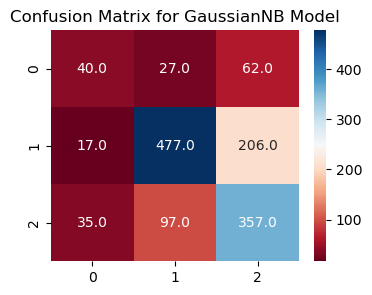

In [142]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_GNB, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for GaussianNB Model")
plt.show()

# 6.1.2 SVM

In [143]:
from sklearn.svm import SVC

In [144]:
classifier = SVC()

In [145]:
classifier.fit(X_train,y_train)

SVC()

In [146]:
y_pred  = classifier.predict(X_test)

In [147]:
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [148]:
#Cheking accuracy
svm_ac = accuracy_score(y_pred, y_test)
print('Accuracy of svm :', svm_ac)

Accuracy of svm : 0.7617602427921093


In [149]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.16      0.91      0.26        22
           0       0.94      0.76      0.84       872
           1       0.66      0.77      0.71       424

    accuracy                           0.76      1318
   macro avg       0.59      0.81      0.61      1318
weighted avg       0.84      0.76      0.79      1318



In [150]:
CM_SVM = confusion_matrix(y_test, y_pred) 
CM_SVM

array([[ 20,  50,  59],
       [  1, 659,  40],
       [  1, 163, 325]], dtype=int64)

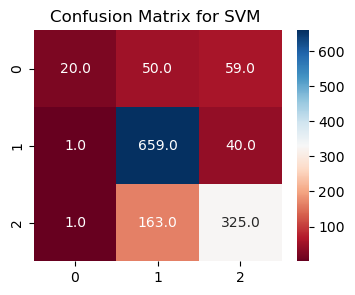

In [151]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_SVM, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for SVM ")
plt.show()

# 6.1.3 LightGBM Classifier Model

In [152]:
from lightgbm import LGBMClassifier

In [153]:
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)

LGBMClassifier()

In [154]:
y_pred_LGBM = LGBM.predict(X_test)
y_pred_LGBM

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [155]:
Acc_LGBM = accuracy_score(y_pred_LGBM, y_test)
print('Accuracy of LightGBM Classifier :', Acc_LGBM)

Accuracy of LightGBM Classifier : 0.7518968133535661


In [156]:
report = classification_report(y_pred_LGBM, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.36      0.64      0.46        72
           0       0.87      0.77      0.82       793
           1       0.69      0.74      0.71       453

    accuracy                           0.75      1318
   macro avg       0.64      0.72      0.66      1318
weighted avg       0.78      0.75      0.76      1318



In [157]:
#Making the Confusion Matrix

In [158]:
CM_LGBM = confusion_matrix(y_test, y_pred_LGBM) 
CM_LGBM

array([[ 46,  43,  40],
       [ 12, 610,  78],
       [ 14, 140, 335]], dtype=int64)

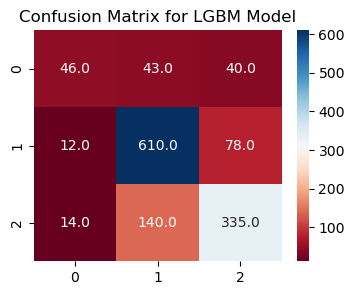

In [159]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_LGBM, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for LGBM Model")
plt.show()

# 6.1.4 Random Forest Classifier Model

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
RFC = RandomForestClassifier(criterion = 'entropy', random_state = 0)
RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [162]:
y_pred_RFC = RFC.predict(X_test)
y_pred_RFC

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [163]:
Acc_RFC = accuracy_score(y_pred_RFC, y_test)
print('Accuracy of Random Forest Classifier :', Acc_RFC)

Accuracy of Random Forest Classifier : 0.7776934749620638


In [164]:
report = classification_report(y_pred_RFC, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.36      0.69      0.48        68
           0       0.93      0.78      0.85       839
           1       0.67      0.80      0.73       411

    accuracy                           0.78      1318
   macro avg       0.65      0.75      0.68      1318
weighted avg       0.82      0.78      0.79      1318



In [165]:
CM_RFC = confusion_matrix(y_test, y_pred_RFC) 
CM_RFC

array([[ 47,  39,  43],
       [  8, 651,  41],
       [ 13, 149, 327]], dtype=int64)

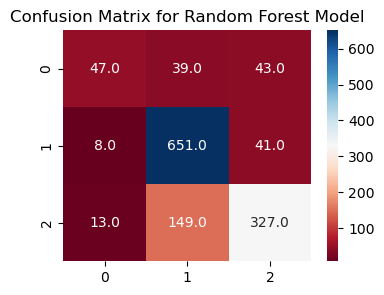

In [166]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_RFC, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

In [167]:
list = [['Gaussian Naive Bayes',Acc_GNB],['Support Vector Machine',svm_ac],
        ['LightGBM Classifier ',Acc_LGBM],['Random Forest Classifier',Acc_RFC]]

In [168]:
Result = pd.DataFrame(list, columns = ['Models', 'Accuracy']) 
Result

Models  Accuracy
0      Gaussian Naive Bayes  0.663126
1    Support Vector Machine  0.761760
2      LightGBM Classifier   0.751897
3  Random Forest Classifier  0.777693

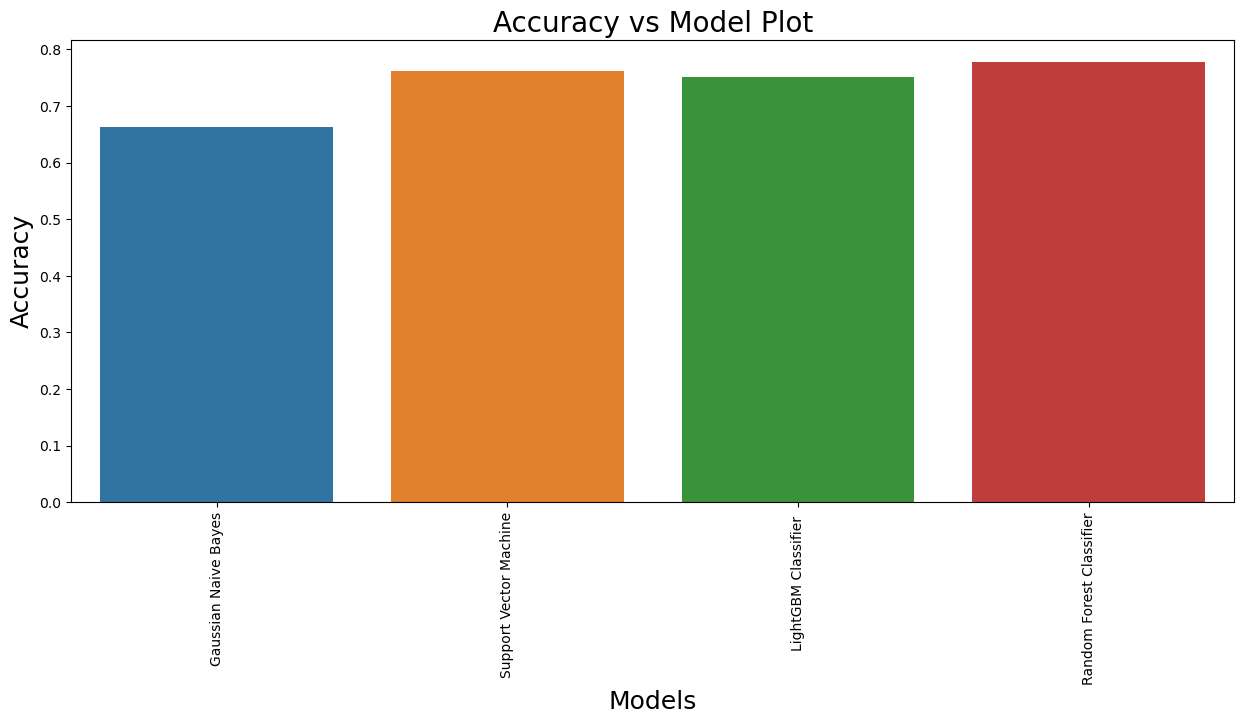

In [169]:
plt.figure(figsize = (15,6))
sns.barplot(data = Result,x = 'Models',y = 'Accuracy')

plt.title('Accuracy vs Model Plot', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)

plt.xticks(rotation = 90)
plt.show()

# 6.2 Using TF-IDF

In [170]:
#Creating Bag of Words

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [172]:
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
X = tfidf.fit_transform(data['Sentence']).toarray()

In [173]:
data['Sentiment'].replace({'positive':1,'negative':-1,'neutral':0},inplace=True)

In [174]:
y = data['Sentiment']

In [175]:
y

0       1
1      -1
2       1
3       0
4       0
       ..
5422    0
5448    1
5472   -1
5550    0
5570    0
Name: Sentiment, Length: 5271, dtype: int64

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3953, 10000)
(3953,)
(1318, 10000)
(1318,)


# 6.2.1 Gaussian Naive Bayes Model

In [177]:
from sklearn.naive_bayes import GaussianNB

In [178]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [179]:
y_pred_GNB = GNB.predict(X_test)
y_pred_GNB

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [180]:
Acc_GNB = accuracy_score(y_pred_GNB, y_test)
print('Accuracy of GaussianNB :', Acc_GNB)

Accuracy of GaussianNB : 0.665402124430956


In [181]:
report = classification_report(y_pred_GNB, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.30      0.47      0.37        83
           0       0.70      0.77      0.74       640
           1       0.71      0.58      0.64       595

    accuracy                           0.67      1318
   macro avg       0.57      0.61      0.58      1318
weighted avg       0.68      0.67      0.67      1318



In [182]:
CM_GNB = confusion_matrix(y_test, y_pred_GNB) 
CM_GNB

array([[ 39,  32,  58],
       [ 15, 493, 192],
       [ 29, 115, 345]], dtype=int64)

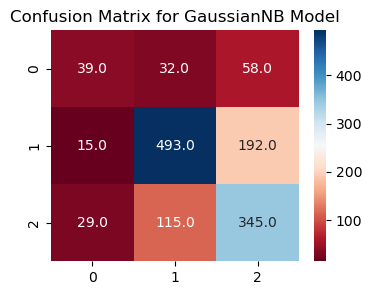

In [183]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_GNB, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for GaussianNB Model")
plt.show()

# 6.2.2 SVM

In [184]:
from sklearn.svm import SVC

In [185]:
classifier = SVC()

In [186]:
classifier.fit(X_train,y_train)

SVC()

In [187]:
y_pred  = classifier.predict(X_test)

In [188]:
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [189]:
#Cheking accuracy
svm_ac = accuracy_score(y_pred, y_test)
print('Accuracy of svm :', svm_ac)

Accuracy of svm : 0.7640364188163885


In [190]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.16      0.88      0.27        24
           0       0.93      0.77      0.84       846
           1       0.69      0.75      0.72       448

    accuracy                           0.76      1318
   macro avg       0.59      0.80      0.61      1318
weighted avg       0.83      0.76      0.79      1318



In [191]:
CM_SVM = confusion_matrix(y_test, y_pred) 
CM_SVM

array([[ 21,  45,  63],
       [  1, 650,  49],
       [  2, 151, 336]], dtype=int64)

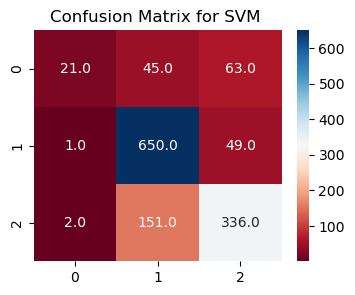

In [192]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_SVM, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for SVM ")
plt.show()

# 6.2.3 LightGBM Classifier Model

In [193]:
from lightgbm import LGBMClassifier

In [194]:
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)

LGBMClassifier()

In [195]:
y_pred_LGBM = LGBM.predict(X_test)
y_pred_LGBM

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [196]:
Acc_LGBM = accuracy_score(y_pred_LGBM, y_test)
print('Accuracy of LightGBM Classifier :', Acc_LGBM)

Accuracy of LightGBM Classifier : 0.7518968133535661


In [197]:
report = classification_report(y_pred_LGBM, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.34      0.63      0.44        70
           0       0.86      0.78      0.82       776
           1       0.70      0.73      0.71       472

    accuracy                           0.75      1318
   macro avg       0.64      0.71      0.66      1318
weighted avg       0.78      0.75      0.76      1318



In [198]:
CM_LGBM = confusion_matrix(y_test, y_pred_LGBM) 
CM_LGBM

array([[ 44,  41,  44],
       [ 11, 604,  85],
       [ 15, 131, 343]], dtype=int64)

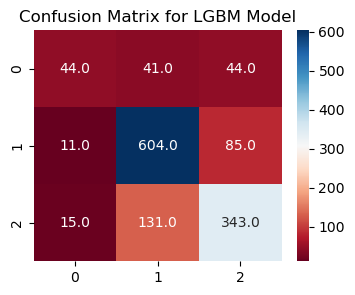

In [199]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_LGBM, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for LGBM Model")
plt.show()

# 6.2.4 Random Forest Classifier Model

In [200]:
from sklearn.ensemble import RandomForestClassifier

In [201]:
RFC = RandomForestClassifier(criterion = 'entropy', random_state = 0)
RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [202]:
y_pred_RFC = RFC.predict(X_test)
y_pred_RFC

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [203]:
Acc_RFC = accuracy_score(y_pred_RFC, y_test)
print('Accuracy of Random Forest Classifier :', Acc_RFC)

Accuracy of Random Forest Classifier : 0.7776934749620638


In [204]:
report = classification_report(y_pred_RFC, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.31      0.73      0.43        55
           0       0.94      0.77      0.85       857
           1       0.67      0.81      0.73       406

    accuracy                           0.78      1318
   macro avg       0.64      0.77      0.67      1318
weighted avg       0.83      0.78      0.79      1318



In [205]:
CM_RFC = confusion_matrix(y_test, y_pred_RFC) 
CM_RFC

array([[ 40,  46,  43],
       [  6, 658,  36],
       [  9, 153, 327]], dtype=int64)

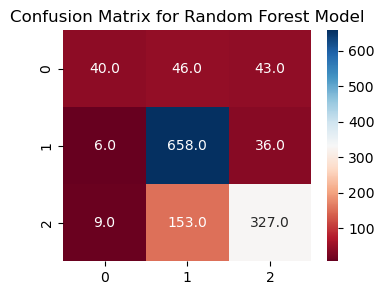

In [206]:
plt.figure(figsize=(4,3))

sns.heatmap(CM_RFC, annot=True, fmt = ".1f",cmap="RdBu")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

In [207]:
list = [['Gaussian Naive Bayes',Acc_GNB],['Support Vector Machine',svm_ac],
        ['LightGBM Classifier ',Acc_LGBM],['Random Forest Classifier',Acc_RFC]]

In [208]:
Result = pd.DataFrame(list, columns = ['Models', 'Accuracy']) 
Result

Models  Accuracy
0      Gaussian Naive Bayes  0.665402
1    Support Vector Machine  0.764036
2      LightGBM Classifier   0.751897
3  Random Forest Classifier  0.777693

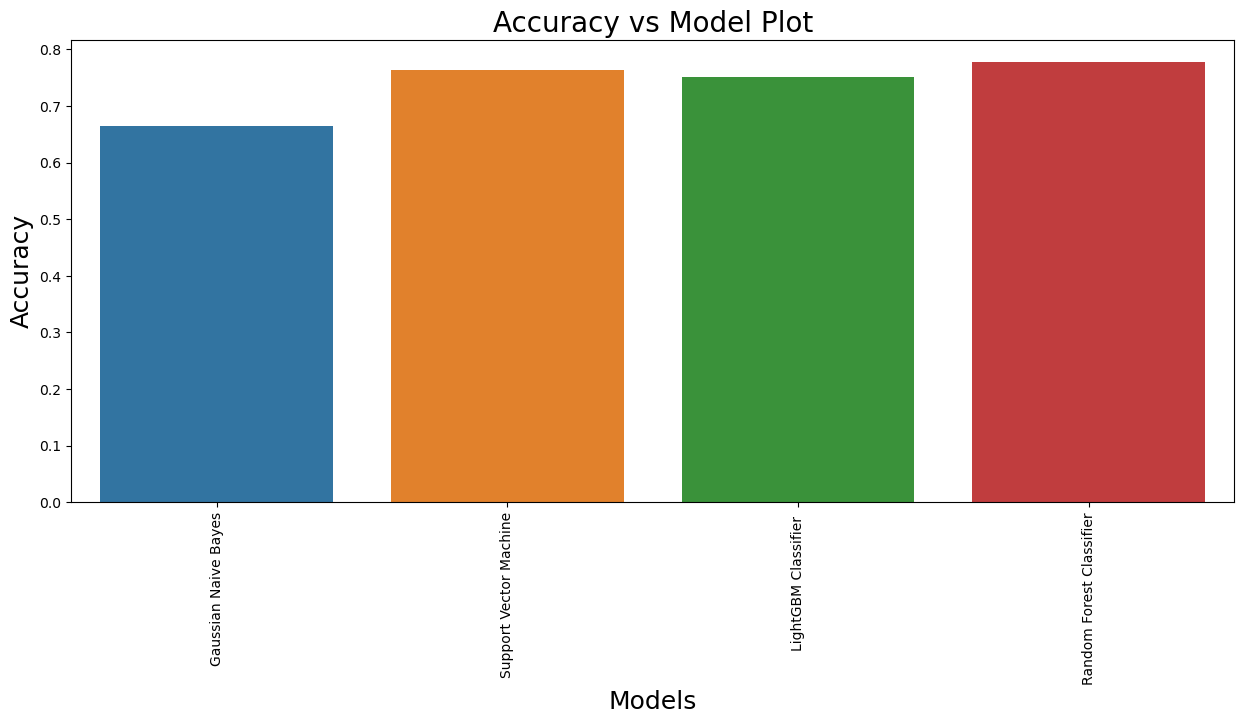

In [209]:
plt.figure(figsize = (15,6))
sns.barplot(data = Result,x = 'Models',y = 'Accuracy')

plt.title('Accuracy vs Model Plot', fontsize=20)
plt.xlabel('Models', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)

plt.xticks(rotation = 90)
plt.show()

# 6.3 Using Word2Vec

In [210]:
# import gensim, logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [211]:
# data1 = data

In [212]:
# data1['smt_doc'] = data['Sentence'].apply(smt)
# data1.head()

In [213]:
# tokenized_sentence = data1['Sentence'].apply(lambda x: x.split()) # tokenizing 
# tokenized_sentence

In [214]:
# model = gensim.models.Word2Vec(
#             tokenized_sentence,
#             #size=200, # desired no. of features/independent variables
#             window=5, # context window size
#             min_count=2, # Ignores all words with total frequency lower than 2.                                  
#             sg = 1, # 1 for skip-gram model
#             hs = 0,
#             negative = 10, # for negative sampling
#             seed = 34
# )

In [215]:
# model.train(tokenized_sentence,total_examples= len(data1['smt_doc']), epochs=20)

In [216]:
# #finding most similar words to fall (fall is available in out corpus)
# model.wv.most_similar(positive="fall")

In [217]:
# def word_vector(tokens, size):
#     vec = np.zeros(size).reshape((1, size))
#     count = 0
#     for word in tokens:
#         try:
#             vec += model.wv[word].reshape((1, size))
#             count += 1.
#         except KeyError:  # handling the case where the token is not in vocabulary
#             continue
#     if count != 0:
#         vec /= count
#     return vec

In [218]:
# wordvec_arrays = np.zeros((len(tokenized_sentence), 100)) 
# for i in range(len(tokenized_sentence)):
#     wordvec_arrays[i,:] = word_vector(tokenized_sentence[i], 100)

# wordvec_df = pd.DataFrame(wordvec_arrays)
# wordvec_df.shape

# 6.5 Model Saving

In [219]:
import pickle
import joblib

In [220]:
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

In [221]:
pickle.dump(RFC, open('RFC.pkl', 'wb'))

In [222]:
# Load the model from Pickle

In [223]:
pickled_model = pickle.load(open('RFC.pkl', 'rb'))
pickled_model.predict(X_test)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [224]:
# saving data into csv for model buiding pov
data.to_csv('data.csv')

# Project Conclusion

In [225]:
#1) by directly looking to the dataset we find that sentiments really make sense

#positive :
#a)  "The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , 
#     a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."
#b)   Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 .
#c)   "The subdivision made sales revenues last year of EUR 480.7 million EUR 414.9 million in 2008 , and operating profits 
#     of EUR 44.5 million EUR 7.4 million .
#d)   Royal Dutch Shell to Buy BG Group for Nearly $70 Billion

#negative :
#a)   $ESI on lows, down $1.50 to $2.50 BK a real possibility"
#b)   "L&G still paying price for dividend cut during crisis, chief says"
#c)   $TSLA recall
#d)   Talentum 's net sales in September were smaller than expected .

#neutral :
#a)   The fine print is here .
#b)   The firm generated sales of 187 mln eur in 2005 .
#c)   The value of the orders is over EUR 10mn .
#d)   Marathon estimates the value of its remaining stake in Protalix at $ 27 million .


In [226]:
#2) by looking at the data, we find that our data contains various punctuations, special symbols, links etc.

In [227]:
#3) before preprocessing text

#totalsentiment ----              positive = 1852              negative = 860                          neutral = 3130
#positive words ----                   6122                         843                                   5504
#negative words ----                   1308                         2701                                  3348


#4)  there are many words in both positive words and negative words which repeat many times.
#    also some words such as win, won, wins exists and all three give one sence i.e. victory.
#    so to count such words which makes one sense we first  need to convert words into base form and then we will count


In [228]:
#5)  why we do lemmatization ?
#    go ---- is a stop word
#    went --- is not a stop word  
#    (both go and went give same sense)

In [229]:
#6)  after preprocessing text

#totalsentiment ----              positive = 1852              negative = 860                          neutral = 3130
#positive words ----                   6360                         955                                   5599
#negative words ----                   1597                         3061                                  3556

#7)  there is an increment in no. of positive and negative words.
#    eg., before lemmatisation crazyest words is there in the dataset which is not a negative word
#         after lemmatisation crazyest become crazy and crazy is a negative word


#8)  In positive sentences there are more positive words than negative words
#    generally we can say (3 to 4 positive words in a positive sentence and 0 to 1 negative word )
#
#    in negative sentences there are more no of negative wors than positive words
#    generally we can say (0 to 1 positive words in a negative sentence and 3 to 4 negative word )
#
#    In neutral sentences there are more positive words than negative words
#    generally we can say (1 to 2 positive words in a neutral sentence and 1 to 2 negative word )

#9)  before preprocessing, in wordcloud for positive words for positive sentiment "good" appears in large size and 
#    "win" appears in small size.
#    after preprocessing, in wordcloud for positive words for positive sentiment both "good" and "win" appears in nearly 
#    same size


In [230]:
#10)  for positive sentiment :
#     top 50 positive words :
#     [('win', 47), ('good', 45), ('well', 40), ('strong', 38), ('improve', 37), ('award', 34), ('lead', 25), ('positive', 25), 
#     ('support', 25), ('gain', 22), ('significant', 19), ('boost', 17), ('like', 16), ('bullish', 16), ('work', 16), 
#     ('nice', 15), ('secure', 13), ('great', 13), ('worth', 13), ('ready', 11), ('approve', 11), ('improvement', 11), 
#     ('right', 10), ('efficient', 10), ('top', 9), ('outperform', 8), ('recommendation', 8), ('pleased', 7), ('stainless', 6), 
#     ('happy', 6), ('capability', 6), ('steady', 6), ('approval', 6), ('solid', 6), ('welcome', 5), ('clear', 5), 
#     ('clearly', 4), ('gold', 4), ('poise', 4), ('enhance', 4), ('flexible', 4), ('progress', 4), ('success', 4), 
#     ('available', 4), ('important', 4), ('hot', 4), ('fast', 4), ('exceed', 4), ('restructure', 4), ('leverage', 3)]
#     
#     top 50 negative words :
#     [('loss', 70), ('break', 28), ('resistance', 10), ('cancer', 9), ('rival', 5), ('negative', 5), ('fall', 5), 
#     ('grind', 4), ('bad', 4), ('issue', 3), ('slow', 3), ('limit', 3), ('rumor', 3), ('liability', 3), ('poor', 3), 
#     ('hang', 3), ('weak', 2), ('vice', 2), ('limited', 2), ('decline', 2), ('exploit', 2), ('hostile', 2), ('cheap', 2), 
#     ('reject', 2), ('risk', 2), ('bias', 2), ('frozen', 2), ('dispute', 1), ('crazy', 1), ('lie', 1), ('tentative', 1), 
#     ('relentless', 1), ('flagging', 1), ('scrap', 1), ('dump', 1), ('debt', 1), ('fear', 1), ('wrong', 1), ('knife', 1), 
#     ('gross', 1), ('stress', 1), ('fail', 1), ('lag', 1), ('broke', 1), ('concern', 1), ('problem', 1), ('breaking', 1), 
#     ('steep', 1), ('funny', 1), ('bore', 1)]

#     for negative sentiment :
#     top 50 positive words :
#     [('like', 10), ('lead', 9), ('support', 9), ('gain', 6), ('good', 6), ('fine', 6), ('work', 5), ('top', 5), ('well', 5), 
#     ('tough', 4), ('restructuring', 4), ('pretty', 3), ('improvement', 3), ('right', 3), ('ready', 2), ('available', 2), 
#     ('significant', 2), ('clearly', 2), ('win', 2), ('nice', 2), ('fresh', 2), ('amazing', 2), ('rejoice', 2),('flexible', 2),
#     ('strong', 1), ('worth', 1), ('faith', 1), ('glisten', 1), ('loyal', 1), ('clean', 1), ('prompt', 1), ('recover', 1), 
#     ('festive', 1), ('redemption', 1), ('clear', 1), ('solid', 1), ('notably', 1), ('reward', 1), ('positive', 1), 
#     ('regal', 1), ('love', 1), ('optimistic', 1), ('loyalty', 1), ('enough', 1), ('uphold', 1), ('award', 1), 
#     ('distinctive', 1), ('pride', 1), ('ease', 1), ('timely', 1)]

#     top 50 negative words :
#     [('fall', 72), ('loss', 70), ('weak', 15), ('decline', 15), ('issue', 13), ('lose', 10), ('negative', 10), 
#     ('downgrade', 10), ('warning', 9), ('bearish', 7), ('debt', 6), ('break', 6), ('resistance', 5), ('sue', 5), 
#     ('redundant', 5), ('miss', 5), ('tumble', 5), ('rival', 5), ('fail', 5), ('slump', 4), ('bad', 4), ('fear', 4), 
#     ('slow', 4), ('strike', 4), ('reject', 4), ('hurt', 3), ('hard', 3), ('weaken', 3), ('sink', 3), ('struggle', 3), 
#     ('accuse', 3), ('blame', 3), ('concern', 3), ('suffer', 3), ('downside', 3), ('weakness', 3), ('trouble', 3), 
#     ('disappoint', 2), ('problem', 2), ('lag', 2), ('lie', 2), ('loose', 2), ('threaten', 2), ('ignore', 2), ('difficult', 2),
#     ('toxic', 2), ('damage', 2), ('breakup', 2), ('hedge', 2), ('threat', 2)]

#     for neutral sentiment :
#     top 50 positive words :
#     [('well', 75), ('right', 36), ('work', 30), ('available', 30), ('lead', 25), ('support', 24), ('good', 18),('secure', 15),
#     ('worth', 15), ('significant', 12), ('top', 11), ('clear', 10), ('approval', 10), ('approve', 10), ('like', 9), 
#     ('free', 9), ('fine', 9), ('important', 8), ('restructuring', 7), ('award', 7), ('great', 6), ('ready', 6), ('fair', 6),
#     ('flexible', 6), ('commitment', 5), ('guidance', 5), ('regard', 5), ('saint', 5), ('effective', 5), ('stainless', 5), 
#     ('patient', 5), ('strong', 5), ('tough', 5), ('variety', 5), ('improvement', 5), ('advanced', 5), ('enough', 5), 
#     ('sustainable', 5), ('modern', 5), ('recommendation', 4), ('gain', 4), ('win', 4), ('outstanding', 4), ('tender', 4), 
#     ('cooperative', 4), ('improve', 4), ('fun', 4), ('promise', 4), ('suitable', 4), ('comprehensive', 4)]

#     top 50 negative words :
#     [('loss', 78), ('fall', 66), ('issue', 51), ('concern', 20), ('vice', 17), ('decline', 16), ('negative', 9), ('debt', 9), 
#     ('complex', 8), ('lose', 8), ('warning', 7), ('gross', 6), ('waste', 6), ('limit', 6), ('break', 6), ('plot', 6), 
#     ('weak', 5), ('expire', 5), ('redundant', 5), ('rail', 4), ('slow', 4), ('strike', 4), ('lie', 4), ('rival', 4), 
#     ('trouble', 4), ('scrap', 3), ('interrupt', 3), ('struggle', 3), ('frozen', 3), ('problem', 3), ('rigid', 3), 
#     ('proprietary', 3), ('poor', 3), ('weaken', 3), ('refuse', 3), ('suffer', 3), ('cold', 3), ('hard', 3), ('rumor', 2), 
#     ('cheap', 2), ('difficult', 2), ('split', 2), ('die', 2), ('layoff', 2), ('burden', 2), ('loose', 2), ('deny', 2), 
#     ('damage', 2), ('sharply', 2), ('fail', 2)]